In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/train-mask/train_mask.csv


In [2]:
import numpy as np
import pandas as pd
import cv2
def rle_encode(im):
    pixels = im.flatten(order = 'F')
    '''
    a =  np.array([[1,1,1,0],      
                   [0,1,1,1], 
                   [1,1,0,1]])
    a = a.flatten(order = 'F')
    #[1 0 1 1 1 1 1 1 0 0 1 1]

    '''
    pixels = np.concatenate([[0],pixels,[0]])
    '''
    左右各扩增一位0
    a_1 = np.concatenate([[0],a,[0]])
    #[0 1 0 1 1 1 1 1 1 0 0 1 1 0]
    '''
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    '''
    在第几位0和1发生改变
    runs = np.where(a_1[1:] != a_1[:-1])[0]+1
    #[ 1  2  3  9 11 13]
    '''
    runs[1::2] -= runs[::2]
    '''
    奇数位表示第几位为1偶数位表示持续多少个
    runs[1::2] -= runs[::2]
    #[ 1  1  3  6 11  2]
    '''
    return ' '.join(str(x) for x in runs)


In [3]:
def rle_decode(mask_rle,shape=(512,512)):
    s = mask_rle.split()
    starts,lengths = [np.asarray(x,dtype=int) for x in(s[0:][::2],s[1:][::2])]
    starts -=1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1],dtype=np.uint8)
    for lo,hi in zip(starts,ends):
        img[lo:hi] = 1
    return img.reshape(shape,order='F')
    

In [4]:
import pandas as pd
import cv2
train_mask = pd.read_csv('../input/train-mask/train_mask.csv',sep='\t',names=['name','mask'])
# 读取第一张图，并将对于的rle解码为mask矩阵
count = 0
percent = [0]*len(train_mask)
for c in range(0,len(train_mask)):
    if type(train_mask['mask'].iloc[c]) == float:
        count += 1 
    else:
        mask1 = rle_decode(train_mask['mask'].iloc[c])
        count_1 = np.sum(mask1 == 1)
        count_0 = np.sum(mask1 == 0)
        percent[c] = count_1/(count_0+count_1)

print('无障碍图片所占比例%f%%'%(count/len(train_mask)*100))
print(percent)

无障碍图片所占比例17.346667%
[0.5703392028808594, 0, 0, 0.05690765380859375, 0.07985687255859375, 0.053836822509765625, 0.2154541015625, 0.00048065185546875, 0, 0.2032012939453125, 0.3397369384765625, 0, 0.0189666748046875, 0.4435272216796875, 0.021167755126953125, 0.09698104858398438, 0.02939605712890625, 0.03963470458984375, 0.051059722900390625, 0.4722175598144531, 0.21315765380859375, 0, 0.4610137939453125, 0.00743865966796875, 0, 0.24647140502929688, 0.3202857971191406, 0, 0.475372314453125, 0.27288818359375, 0.045196533203125, 0.44802093505859375, 0.16383743286132812, 0.001712799072265625, 0, 0.25345611572265625, 0.0481414794921875, 0.16045761108398438, 0.3614006042480469, 0.3318061828613281, 0.3032112121582031, 0.23463821411132812, 0.11233901977539062, 0, 0.480621337890625, 0, 0, 0.013576507568359375, 0.44751739501953125, 0.5060081481933594, 0.35614776611328125, 0.11076736450195312, 0, 0.1311187744140625, 0, 0.6133651733398438, 0.265167236328125, 0.07356643676757812, 0.16985321044921875,

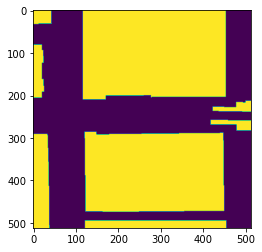

In [5]:
from PIL import Image
from IPython.display import Image as IMG
from matplotlib import pyplot as plt
mask_0 = rle_decode(train_mask['mask'].iloc[0])
new_im = Image.fromarray(mask_0)
plt.imshow(new_im)

In [ ]:
for value in percent:
    value_sum = 0
    value_sum += value*100 
value_average = value_sum/len(train_mask)
print('建筑物所占区平均百分比为%f%%'%(value_average*100))

建筑物所占区平均百分比为0.036484%
